Setup Environment

In [95]:
#pipinstall vizdoom and clone repo in new folder
#!cd github & git clone https://github.com/Farama-Foundation/ViZDoom.git

#import vizdoom to setup game environment
from vizdoom import *

import random
import time
import numpy as np
from matplotlib import pyplot as plt


Setting up Doom with OpenAI Gym

In [7]:
#pip install and import gym environment
from gym import Env
from gym.spaces import Discrete, Box
import cv2

In [86]:
class VizDoomGym(Env):
    #called when env is started > game
    def __init__(self,render=False):
        self.game = DoomGame()
        self.game.load_config("github/VizDoom/scenarios/basic.cfg")
        
        #Disable or enable window visiblity when game is running
        if render == False:
            self.game.set_window_visible(False)
        else:
            self.game.set_window_visible(True)
        
        self.game.init()
    
        
        
        #create obs and action space
        #low/high indicates pixel vals
        self.observation_space = Box(low=0,high=255,shape=(3,320,240),dtype=np.uint8)
        self.action_space = Discrete(3)
    #tale actons
    def step(self,action):
        actions = np.identity(3,dtype=np.uint8)
        
        #take action, make_action() returns reward value for taking ste
        #2nd para is frame skip to give time between taking action and receiving result
        reward = self.game.make_action(actions[action],4)
        
        #if something is returned from game_state()
        if self.game.get_state():
            #get game state to grab screen image
            state = self.game.get_state().screen_buffer
            #apply grayscale
            state = self.grayscale(state)
            #use game state to grab game vars, i.e. ammo
            info = self.game.get_state().game_variables
            
        #game_state returns nothing/errors out
        else:
            state = np.zeros(self.observation_space.shape)
            info = 0
        
        done = self.game.is_episode_finished()
        
        
        return state,reward,done,info
    def render():
        pass
    
    #resets game
    def reset(self):
        self.game.new_episode()
        state = self.game.get_state().screen_buffer
        return self.grayscale(state)
    
    #grayscale frame and resize to make training faster
    def grayscale(self,observation):
        gray = cv2.cvtColor(np.moveaxis(observation,0,-1),cv2.COLOR_BGR2GRAY)
        resize = cv2.resize(gray, (160,100),interpolation=cv2.INTER_CUBIC)
        state = np.reshape(resize,(100,160,1))
        return state
    #close the game
    def close(self):
        self.game.close()

In [88]:
env = VizDoomGym(render=True)

In [89]:
env.step(2)

(array([[35, 39, 39, ..., 39, 39, 39],
        [59, 67, 59, ..., 67, 67, 91],
        [79, 79, 79, ..., 79, 91, 91],
        ...,
        [19, 19, 11, ..., 47, 47, 55],
        [19, 27, 19, ..., 47, 47, 47],
        [11, 19, 19, ..., 27, 19, 19]], dtype=uint8),
 -4.0,
 False,
 array([50.]))

In [73]:
env.observation_space.sample().shape

(3, 320, 240)

In [85]:
env.grayscale()

TypeError: grayscale() missing 1 required positional argument: 'observation'

In [90]:
state = env.reset()

In [91]:
state.shape

(240, 320)

In [92]:
env.close()

C:\Users\ahmed\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


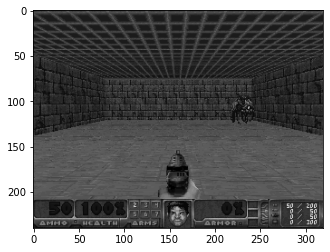

In [94]:
from matplotlib import pyplot as plt
plt.imshow(cv2.cvtColor(state,cv2.COLOR_BGR2RGB))